In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from ydata_synthetic.utils.cache import cache_file
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from scipy import signal

In [9]:
df = pd.read_csv("full_6.csv")
df = df.drop(columns=['AggLabel', 'Label_DA_001','Label_DA_10','Label_DA_3OPs','Label_LA_3','Label_LA_30Hz'])
df = pd.concat([df.Label_DA_3, df.iloc[:, 184:384]], axis=1)
df

,Label_DA_3,DA_3_0,DA_3_1,DA_3_2,DA_3_3,DA_3_4,DA_3_5,DA_3_6,DA_3_7,DA_3_8,...,DA_3_190,DA_3_191,DA_3_192,DA_3_193,DA_3_194,DA_3_195,DA_3_196,DA_3_197,DA_3_198,DA_3_199
0,1,1436.246856,1642.362056,1338.971456,1658.801556,66.188250,-3803.141844,-10322.673344,-17083.950344,-21718.015344,...,489259.029656,480278.429656,476579.409656,476232.569656,473212.929656,466045.849656,461258.229656,457643.069656,454674.529656,452894.569656
1,1,652.321895,-6807.494652,-10243.259652,-11842.873652,-22234.433652,-38799.363652,-52906.418652,-64697.053652,-81074.323652,...,-56391.953652,-59640.340652,-60791.913652,-59222.027652,-54235.246652,-50835.187652,-52161.393652,-52795.283652,-51421.597652,-52999.003652
2,1,115.170974,-3825.272426,-4618.140526,-7062.034126,-14620.419426,-25174.673426,-38699.396426,-54834.866426,-70866.736426,...,78988.093574,79564.903574,81659.553574,84791.743574,91425.908574,92662.323574,89162.823574,90864.673574,96028.693574,99324.543574
3,1,-7435.834171,-4189.748271,-2057.848871,-1565.527571,-1866.535371,-4139.430871,-4425.895671,-3189.907471,-3797.714071,...,-35359.953871,-38467.669871,-36878.068871,-33526.271871,-32067.896871,-34291.337871,-38808.643871,-43602.493871,-48145.593871,-48260.599871
4,0,1164.977541,-1925.196259,-2071.696259,-1286.186459,-2502.465759,-4381.641759,-8380.947759,-13841.836759,-22807.787759,...,123186.716241,124430.760241,120359.500241,114442.590241,111607.480241,113401.280241,112663.650241,106195.450241,100429.184241,99907.434241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,0,-8295.322762,-5777.762762,-4257.672762,-6268.462762,-8913.292762,-13639.698762,-22268.992762,-33073.082762,-41722.672762,...,-31311.662762,-29167.416762,-27044.832762,-27525.352762,-27228.582762,-24336.122762,-21236.442762,-19861.198762,-19285.182762,-16850.402762
1060,0,3414.816349,2755.964849,425.480474,-4082.871051,-13596.484651,-26271.762651,-40566.142651,-56948.105651,-74543.452651,...,28485.089349,29849.097349,28073.987349,27410.410349,29485.113349,31194.480349,33948.027349,36732.847349,35847.043349,34875.607349
1061,0,-4929.953286,-4772.680286,-5107.871286,-5276.025286,-6583.365286,-8781.785286,-12477.371286,-16944.551286,-19802.019286,...,85981.319714,95886.674714,101169.222714,102521.667714,109375.144714,120792.472714,129322.074714,136197.334714,146676.339714,155378.904714
1062,0,-6748.774548,-6746.005148,-5075.389848,-2148.048078,-2414.725818,-7821.276548,-14254.763548,-25701.632548,-45850.673548,...,532611.596452,540835.296452,543567.156452,543947.156452,545383.346452,548293.846452,553929.496452,561911.996452,569047.596452,568885.296452


In [10]:
df_zeros = df[df['Label_DA_3'] == 0]
df_ones = df[df['Label_DA_3'] == 1]
df_ones

,Label_DA_3,DA_3_0,DA_3_1,DA_3_2,DA_3_3,DA_3_4,DA_3_5,DA_3_6,DA_3_7,DA_3_8,...,DA_3_190,DA_3_191,DA_3_192,DA_3_193,DA_3_194,DA_3_195,DA_3_196,DA_3_197,DA_3_198,DA_3_199
0,1,1436.246856,1642.362056,1338.971456,1658.801556,66.188250,-3803.141844,-10322.673344,-17083.950344,-21718.015344,...,4.892590e+05,4.802784e+05,4.765794e+05,4.762326e+05,4.732129e+05,4.660458e+05,4.612582e+05,4.576431e+05,4.546745e+05,4.528946e+05
1,1,652.321895,-6807.494652,-10243.259652,-11842.873652,-22234.433652,-38799.363652,-52906.418652,-64697.053652,-81074.323652,...,-5.639195e+04,-5.964034e+04,-6.079191e+04,-5.922203e+04,-5.423525e+04,-5.083519e+04,-5.216139e+04,-5.279528e+04,-5.142160e+04,-5.299900e+04
2,1,115.170974,-3825.272426,-4618.140526,-7062.034126,-14620.419426,-25174.673426,-38699.396426,-54834.866426,-70866.736426,...,7.898809e+04,7.956490e+04,8.165955e+04,8.479174e+04,9.142591e+04,9.266232e+04,8.916282e+04,9.086467e+04,9.602869e+04,9.932454e+04
3,1,-7435.834171,-4189.748271,-2057.848871,-1565.527571,-1866.535371,-4139.430871,-4425.895671,-3189.907471,-3797.714071,...,-3.535995e+04,-3.846767e+04,-3.687807e+04,-3.352627e+04,-3.206790e+04,-3.429134e+04,-3.880864e+04,-4.360249e+04,-4.814559e+04,-4.826060e+04
5,1,-5989.151617,-8790.345617,-12386.457617,-13229.833617,-11766.220617,-8393.697617,-5881.943017,-5567.432217,-7314.624617,...,-6.862323e+04,-6.625989e+04,-6.664522e+04,-6.755094e+04,-6.825880e+04,-7.003327e+04,-6.882972e+04,-6.827472e+04,-7.030053e+04,-6.859427e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1,22220.922000,20393.362000,21402.272000,21594.736000,17361.197000,11461.152000,9203.955000,8163.166000,4282.775000,...,1.116245e+06,1.131022e+06,1.130795e+06,1.128060e+06,1.127617e+06,1.129354e+06,1.136022e+06,1.136679e+06,1.136789e+06,1.139753e+06
1047,1,4255.130000,-1437.765000,-2111.933000,-2915.950000,-8023.246000,-15127.610000,-23746.200000,-30113.300000,-32169.840000,...,-1.224511e+05,-1.218680e+05,-1.197867e+05,-1.175885e+05,-1.168407e+05,-1.191513e+05,-1.184536e+05,-1.143237e+05,-1.112972e+05,-1.106160e+05
1051,1,-3916.391714,-2489.051714,-2245.531714,-2645.841714,-4099.851714,-6940.471714,-12052.551714,-20424.597714,-29391.351714,...,-6.581766e+04,-6.737530e+04,-7.161686e+04,-7.255586e+04,-7.234197e+04,-7.462658e+04,-7.433380e+04,-7.388968e+04,-7.604674e+04,-7.634768e+04
1053,1,299.848189,-823.424881,-2775.233641,-1437.900441,-947.915041,-4514.752241,-8265.574941,-12032.272241,-17942.376241,...,-2.493348e+04,-2.407598e+04,-2.157934e+04,-2.090158e+04,-2.296147e+04,-2.461440e+04,-2.729226e+04,-3.259970e+04,-3.509941e+04,-3.282387e+04


## Train Abnormal Samples Generator

In [43]:
batch_size = 250
epochs = 500+1
learning_rate = 2e-4
beta_1 = 0.5
beta_2 = 0.9

ctgan_args = ModelParameters(batch_size=batch_size,
                             lr=learning_rate,
                             betas=(beta_1, beta_2))

train_args = TrainParameters(epochs=epochs)

# Init the CTGAN
synth = RegularSynthesizer(modelname='ctgan', model_parameters=ctgan_args)

#Training the CTGAN
synth.fit(data=df_ones.iloc[:,1:], train_arguments=train_args, num_cols=list(df_ones.columns[1:]), cat_cols=list(df_ones.columns[0]))

Epoch: 0 | critic_loss: 1.3151086568832397 | generator_loss: -0.19721107184886932
Epoch: 1 | critic_loss: 0.6623317003250122 | generator_loss: -0.244277223944664
Epoch: 2 | critic_loss: 0.19563591480255127 | generator_loss: -0.44971394538879395
Epoch: 3 | critic_loss: -0.33071374893188477 | generator_loss: -0.6680419445037842
Epoch: 4 | critic_loss: -1.4195451736450195 | generator_loss: -0.9398820996284485
Epoch: 5 | critic_loss: -2.3608293533325195 | generator_loss: -1.2466180324554443
Epoch: 6 | critic_loss: -3.283827781677246 | generator_loss: -1.4876686334609985
Epoch: 7 | critic_loss: -4.310634613037109 | generator_loss: -2.082223415374756
Epoch: 8 | critic_loss: -4.90443229675293 | generator_loss: -2.276465654373169
Epoch: 9 | critic_loss: -6.476036548614502 | generator_loss: -3.0169689655303955
Epoch: 10 | critic_loss: -7.393094539642334 | generator_loss: -3.745098829269409
Epoch: 11 | critic_loss: -7.846121788024902 | generator_loss: -4.434136867523193
Epoch: 12 | critic_loss: 

Epoch: 101 | critic_loss: -41.481056213378906 | generator_loss: -23.64956283569336
Epoch: 102 | critic_loss: -37.04922103881836 | generator_loss: -22.691499710083008
Epoch: 103 | critic_loss: -37.524505615234375 | generator_loss: -22.162565231323242
Epoch: 104 | critic_loss: -37.156124114990234 | generator_loss: -24.564008712768555
Epoch: 105 | critic_loss: -34.94188690185547 | generator_loss: -22.980998992919922
Epoch: 106 | critic_loss: -44.229042053222656 | generator_loss: -23.675575256347656
Epoch: 107 | critic_loss: -37.557647705078125 | generator_loss: -22.864612579345703
Epoch: 108 | critic_loss: -37.24934005737305 | generator_loss: -23.25084686279297
Epoch: 109 | critic_loss: -35.46940994262695 | generator_loss: -23.034177780151367
Epoch: 110 | critic_loss: -40.803688049316406 | generator_loss: -22.108579635620117
Epoch: 111 | critic_loss: -38.081871032714844 | generator_loss: -23.228843688964844
Epoch: 112 | critic_loss: -30.456893920898438 | generator_loss: -23.20253944396972

Epoch: 200 | critic_loss: -31.740480422973633 | generator_loss: -21.455917358398438
Epoch: 201 | critic_loss: -31.85494613647461 | generator_loss: -22.971054077148438
Epoch: 202 | critic_loss: -32.686588287353516 | generator_loss: -21.701913833618164
Epoch: 203 | critic_loss: -29.021615982055664 | generator_loss: -21.373289108276367
Epoch: 204 | critic_loss: -28.998857498168945 | generator_loss: -20.865297317504883
Epoch: 205 | critic_loss: -29.031152725219727 | generator_loss: -20.175294876098633
Epoch: 206 | critic_loss: -31.08822250366211 | generator_loss: -22.376371383666992
Epoch: 207 | critic_loss: -28.28982925415039 | generator_loss: -23.441883087158203
Epoch: 208 | critic_loss: -32.579532623291016 | generator_loss: -21.193208694458008
Epoch: 209 | critic_loss: -27.66368865966797 | generator_loss: -22.562480926513672
Epoch: 210 | critic_loss: -30.975784301757812 | generator_loss: -22.068199157714844
Epoch: 211 | critic_loss: -27.727554321289062 | generator_loss: -23.311840057373

Epoch: 299 | critic_loss: -23.032230377197266 | generator_loss: -21.45675277709961
Epoch: 300 | critic_loss: -21.514251708984375 | generator_loss: -20.086257934570312
Epoch: 301 | critic_loss: -24.192651748657227 | generator_loss: -22.260244369506836
Epoch: 302 | critic_loss: -21.456809997558594 | generator_loss: -20.830810546875
Epoch: 303 | critic_loss: -24.379308700561523 | generator_loss: -21.624910354614258
Epoch: 304 | critic_loss: -22.909696578979492 | generator_loss: -20.341123580932617
Epoch: 305 | critic_loss: -24.829221725463867 | generator_loss: -21.654830932617188
Epoch: 306 | critic_loss: -21.403398513793945 | generator_loss: -22.01636505126953
Epoch: 307 | critic_loss: -24.05755043029785 | generator_loss: -18.8049373626709
Epoch: 308 | critic_loss: -23.79157829284668 | generator_loss: -23.33734893798828
Epoch: 309 | critic_loss: -24.458961486816406 | generator_loss: -20.250877380371094
Epoch: 310 | critic_loss: -25.022920608520508 | generator_loss: -20.669404983520508
Ep

Epoch: 398 | critic_loss: -21.130016326904297 | generator_loss: -14.483177185058594
Epoch: 399 | critic_loss: -18.889047622680664 | generator_loss: -14.736061096191406
Epoch: 400 | critic_loss: -18.192773818969727 | generator_loss: -14.910165786743164
Epoch: 401 | critic_loss: -18.550296783447266 | generator_loss: -15.765576362609863
Epoch: 402 | critic_loss: -20.129573822021484 | generator_loss: -16.174419403076172
Epoch: 403 | critic_loss: -20.682849884033203 | generator_loss: -14.629084587097168
Epoch: 404 | critic_loss: -20.84417152404785 | generator_loss: -16.6881046295166
Epoch: 405 | critic_loss: -19.17938232421875 | generator_loss: -14.624451637268066
Epoch: 406 | critic_loss: -17.341018676757812 | generator_loss: -14.492252349853516
Epoch: 407 | critic_loss: -21.56534194946289 | generator_loss: -14.708504676818848
Epoch: 408 | critic_loss: -19.794109344482422 | generator_loss: -13.274648666381836
Epoch: 409 | critic_loss: -17.71015167236328 | generator_loss: -13.61017322540283

Epoch: 497 | critic_loss: -22.185544967651367 | generator_loss: -9.872895240783691
Epoch: 498 | critic_loss: -20.096328735351562 | generator_loss: -10.246438980102539
Epoch: 499 | critic_loss: -22.25019073486328 | generator_loss: -9.536587715148926
Epoch: 500 | critic_loss: -21.422895431518555 | generator_loss: -11.178757667541504


## Sample N Abnormal Traces

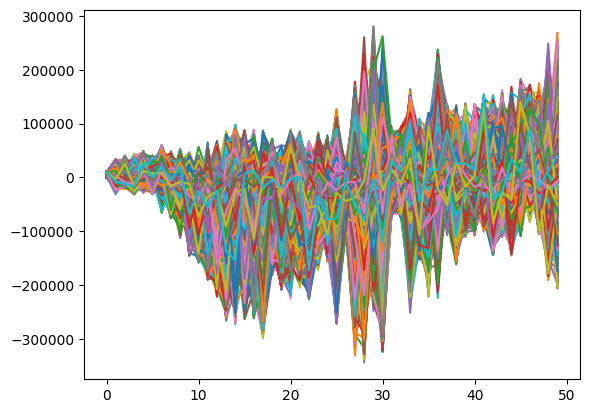

In [53]:
synth_one_gen = synth.sample(10000)
for row in synth_one_gen.itertuples():
    plt.plot(list(row[:50]))

[2.76887141e-08 1.38443571e-07 2.76887141e-07 2.76887141e-07
 1.38443571e-07 2.76887141e-08]
[ 1.         -4.7966816   9.20724238 -8.84036968  4.24578647 -0.81597668]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


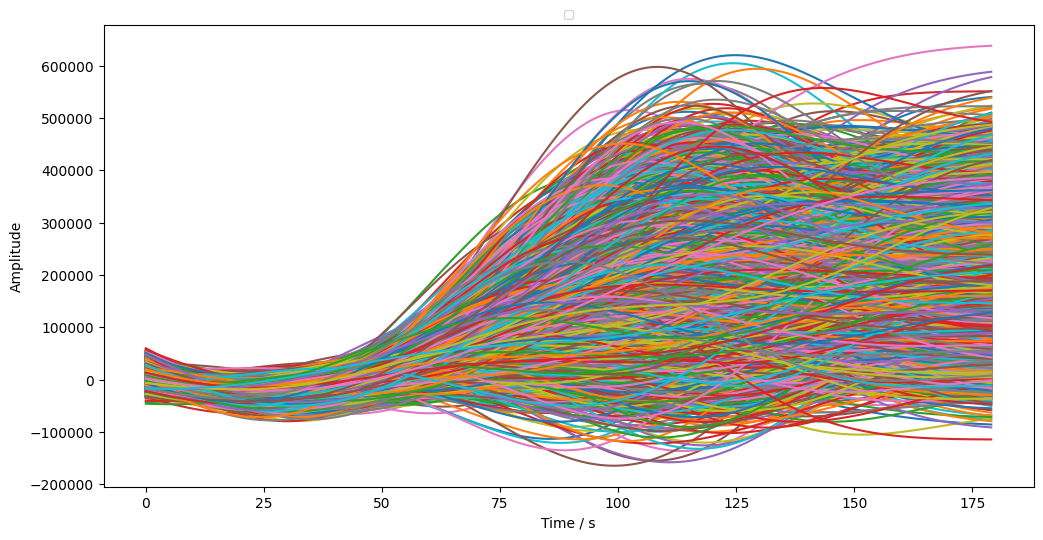

In [54]:
b, a = signal.iirfilter(5, Wn=4, fs=400, btype="low", ftype="butter")
print(b, a, sep="\n")

yraw = synth_one_gen
y_lfilter_ab = signal.filtfilt(b, a, yraw)

plt.figure(figsize=[12, 6])

for row in y_lfilter_ab:
    plt.plot(list(row[:180]))
    
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],
           ncol=2, fontsize="smaller")

## Train Normal Samples Generator

In [44]:
batch_size = 250
epochs = 500+1
learning_rate = 2e-4
beta_1 = 0.5
beta_2 = 0.9

ctgan_args = ModelParameters(batch_size=batch_size,
                             lr=learning_rate,
                             betas=(beta_1, beta_2))

train_args = TrainParameters(epochs=epochs)

# Init the CTGAN
synth_zeros = RegularSynthesizer(modelname='ctgan', model_parameters=ctgan_args)

#Training the CTGAN
synth_zeros.fit(data=df_zeros.iloc[:,1:], train_arguments=train_args, num_cols=list(df_zeros.columns[1:]), cat_cols=None)

Epoch: 0 | critic_loss: 0.06913018226623535 | generator_loss: -0.0830085352063179
Epoch: 1 | critic_loss: -1.4039556980133057 | generator_loss: -0.554610013961792
Epoch: 2 | critic_loss: -4.311774253845215 | generator_loss: -1.5749379396438599
Epoch: 3 | critic_loss: -6.859564304351807 | generator_loss: -2.8031351566314697
Epoch: 4 | critic_loss: -8.253390312194824 | generator_loss: -4.801656723022461
Epoch: 5 | critic_loss: -9.736997604370117 | generator_loss: -7.023821830749512
Epoch: 6 | critic_loss: -9.833471298217773 | generator_loss: -8.641241073608398
Epoch: 7 | critic_loss: -12.231914520263672 | generator_loss: -9.11322021484375
Epoch: 8 | critic_loss: -12.83230209350586 | generator_loss: -10.57807731628418
Epoch: 9 | critic_loss: -15.749971389770508 | generator_loss: -11.964388847351074
Epoch: 10 | critic_loss: -16.89708137512207 | generator_loss: -13.070063591003418
Epoch: 11 | critic_loss: -18.63159942626953 | generator_loss: -13.356806755065918
Epoch: 12 | critic_loss: -21.

Epoch: 100 | critic_loss: -11.658210754394531 | generator_loss: -10.862332344055176
Epoch: 101 | critic_loss: -12.398307800292969 | generator_loss: -8.271129608154297
Epoch: 102 | critic_loss: -12.811981201171875 | generator_loss: -8.080768585205078
Epoch: 103 | critic_loss: -13.470497131347656 | generator_loss: -8.046896934509277
Epoch: 104 | critic_loss: -11.482418060302734 | generator_loss: -7.942548751831055
Epoch: 105 | critic_loss: -7.635677337646484 | generator_loss: -8.330820083618164
Epoch: 106 | critic_loss: -10.815291404724121 | generator_loss: -8.212794303894043
Epoch: 107 | critic_loss: -9.313579559326172 | generator_loss: -8.386220932006836
Epoch: 108 | critic_loss: -11.23890495300293 | generator_loss: -8.114728927612305
Epoch: 109 | critic_loss: -10.771034240722656 | generator_loss: -7.827352523803711
Epoch: 110 | critic_loss: -9.794478416442871 | generator_loss: -7.2836503982543945
Epoch: 111 | critic_loss: -9.584047317504883 | generator_loss: -5.613889694213867
Epoch: 

Epoch: 200 | critic_loss: -38.93531799316406 | generator_loss: 33.89027404785156
Epoch: 201 | critic_loss: -42.51727294921875 | generator_loss: 36.29313659667969
Epoch: 202 | critic_loss: -44.44428253173828 | generator_loss: 36.64472579956055
Epoch: 203 | critic_loss: -43.66190719604492 | generator_loss: 37.781185150146484
Epoch: 204 | critic_loss: -46.44023132324219 | generator_loss: 40.22513198852539
Epoch: 205 | critic_loss: -42.96553039550781 | generator_loss: 39.73069381713867
Epoch: 206 | critic_loss: -47.218017578125 | generator_loss: 35.63832473754883
Epoch: 207 | critic_loss: -47.03923416137695 | generator_loss: 37.58500671386719
Epoch: 208 | critic_loss: -49.287269592285156 | generator_loss: 35.14175796508789
Epoch: 209 | critic_loss: -52.07353591918945 | generator_loss: 35.46337890625
Epoch: 210 | critic_loss: -51.98931884765625 | generator_loss: 36.33195495605469
Epoch: 211 | critic_loss: -42.411861419677734 | generator_loss: 37.873565673828125
Epoch: 212 | critic_loss: -48

Epoch: 302 | critic_loss: -122.61134338378906 | generator_loss: 61.051658630371094
Epoch: 303 | critic_loss: -117.39874267578125 | generator_loss: 64.12159729003906
Epoch: 304 | critic_loss: -119.96470642089844 | generator_loss: 61.180946350097656
Epoch: 305 | critic_loss: -107.31724548339844 | generator_loss: 58.84355926513672
Epoch: 306 | critic_loss: -106.49079895019531 | generator_loss: 60.43001937866211
Epoch: 307 | critic_loss: -107.42329406738281 | generator_loss: 65.43492889404297
Epoch: 308 | critic_loss: -93.15823364257812 | generator_loss: 64.18180084228516
Epoch: 309 | critic_loss: -127.22502136230469 | generator_loss: 62.46244812011719
Epoch: 310 | critic_loss: -113.99916076660156 | generator_loss: 63.60813522338867
Epoch: 311 | critic_loss: -110.0863265991211 | generator_loss: 64.6974868774414
Epoch: 312 | critic_loss: -121.92082977294922 | generator_loss: 62.97173309326172
Epoch: 313 | critic_loss: -122.32679748535156 | generator_loss: 61.018192291259766
Epoch: 314 | cri

Epoch: 403 | critic_loss: -187.57965087890625 | generator_loss: 89.3592758178711
Epoch: 404 | critic_loss: -206.07289123535156 | generator_loss: 83.19964599609375
Epoch: 405 | critic_loss: -215.3566436767578 | generator_loss: 86.80130767822266
Epoch: 406 | critic_loss: -194.31265258789062 | generator_loss: 86.36265563964844
Epoch: 407 | critic_loss: -226.93319702148438 | generator_loss: 84.08039093017578
Epoch: 408 | critic_loss: -206.36181640625 | generator_loss: 81.34111022949219
Epoch: 409 | critic_loss: -206.01528930664062 | generator_loss: 87.51636505126953
Epoch: 410 | critic_loss: -209.71446228027344 | generator_loss: 87.96540832519531
Epoch: 411 | critic_loss: -187.26678466796875 | generator_loss: 86.00440216064453
Epoch: 412 | critic_loss: -193.767578125 | generator_loss: 85.08073425292969
Epoch: 413 | critic_loss: -190.41412353515625 | generator_loss: 84.51312255859375
Epoch: 414 | critic_loss: -205.89248657226562 | generator_loss: 83.00858306884766
Epoch: 415 | critic_loss: 

## Generate N Normal Traces

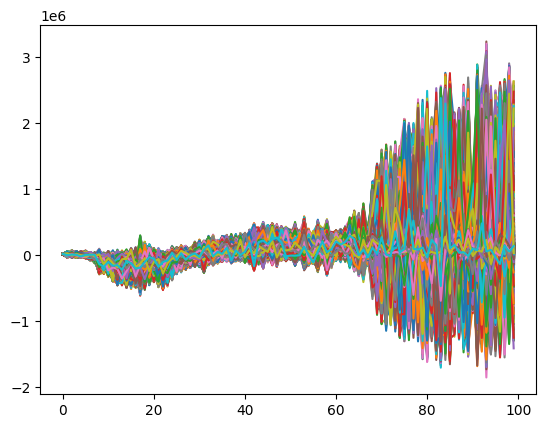

In [55]:
synth_zero_gen = synth_zeros.sample(10000)
for row in synth_zero_gen.itertuples():
    plt.plot(list(row[:100]))

[1.11817190e-13 1.11817190e-12 5.03177353e-12 1.34180627e-11
 2.34816098e-11 2.81779318e-11 2.34816098e-11 1.34180627e-11
 5.03177353e-12 1.11817190e-12 1.11817190e-13]
[   1.           -9.33060445   39.19822145  -97.63570245  159.6780226
 -179.16174472  139.66870704  -74.69786982   26.22978653   -5.46061821
    0.51180202]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


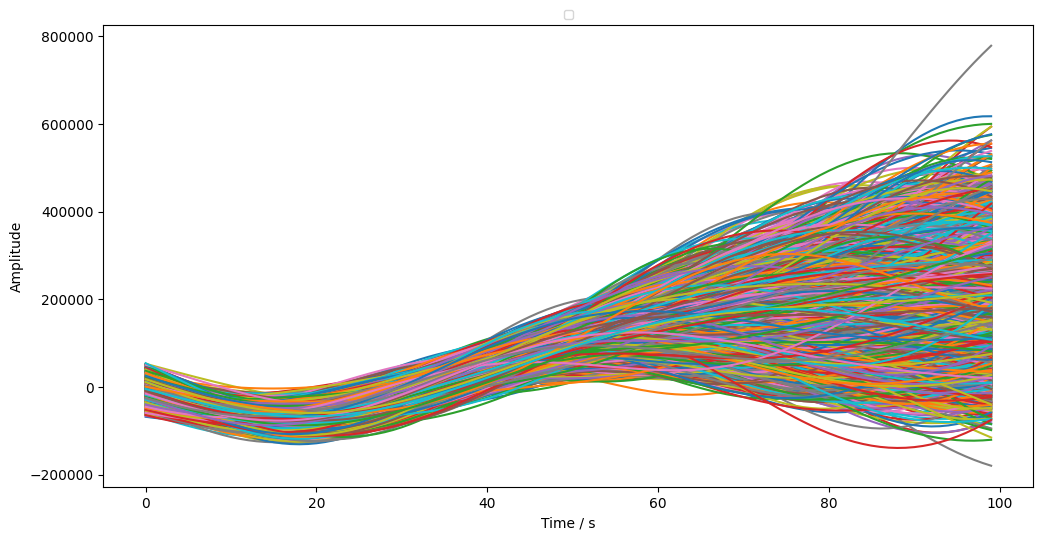

In [56]:
b, a = signal.iirfilter(10, Wn=5, fs=300, btype="low", ftype="butter")
print(b, a, sep="\n")

yraw = synth_zero_gen
y_lfilter_n = signal.filtfilt(b, a, yraw)

plt.figure(figsize=[12, 6])

for row in y_lfilter_n:
    plt.plot(list(row[:100]))
    
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],
           ncol=2, fontsize="smaller")

## Plot all generated waveforms

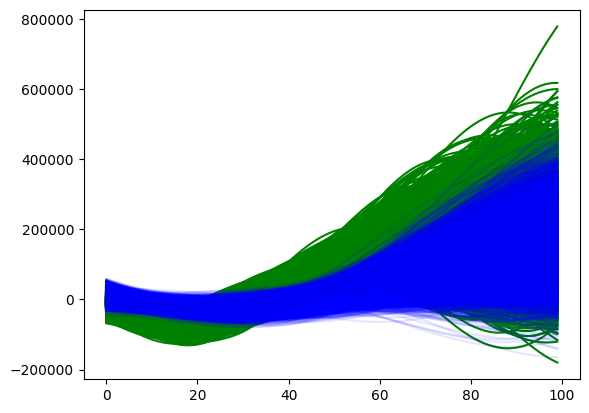

In [58]:
for row in y_lfilter_n:
    plt.plot(list(row[:100]), color='green')
    
for row in y_lfilter_ab:
    plt.plot(list(row[:100]), color='blue', alpha=0.1)

In [50]:
def save_traces(name):
    synth_zero_gen.insert(loc=0, column="Label", value=0)
    synth_one_gen.insert(loc=0, column="Label", value=1)
    merged_df = pd.concat([synth_zero_gen, synth_one_gen],axis=0).sample(frac=1.0).reset_index()
    merged_df.to_csv(name+'_syn.csv')

In [51]:
save_traces('da3')
synth_zero_gen =synth_zero_gen.drop(columns=['Label'])
synth_one_gen = synth_one_gen.drop(columns=['Label'])

C:\Users\ykravche\AppData\Local\Temp\ipykernel_3244\347139440.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  synth_one_gen.insert(loc=0, column="Label", value=1)
